# Sentiment Analysis of ESG news

In [1]:
import pandas as pd
from ftfy import fix_text
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
import spacy
nlp = spacy.load("en_core_web_sm")
import re
from collections import Counter


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Read File & Data Preprocessing

In [2]:
df = pd.read_csv("ESG_daily_news.csv", encoding="latin1")

# Fix the garbled characters
text_columns = df.select_dtypes(include=['object']).columns
for col in text_columns:
    df[col] = df[col].astype(str).apply(fix_text)
    df[col] = df[col].astype(str).str.replace("�"," ")
    df[col] = df[col].astype(str).str.replace("\'s","'s")

def clean_with_spacy(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return ' '.join(tokens)

# combine the columns
text_cols = df.columns[2:]
df['text'] = df[text_cols].astype(str).apply(lambda x: ' '.join(x[x != 'nan']), axis=1)
df = df[['Date', 'headline', 'text']]
df['content_clean'] = df['headline'].astype(str) + ". " + df['text'].astype(str)
df['content_clean'] = df['content_clean'].apply(clean_with_spacy)
# df.to_csv("ESG_daily_news_clean.csv", index=False, encoding="utf-8-sig")
df

,Date,headline,text,content_clean
0,2022/11/28,Top-Ranked Hedge Fund Makes Contrarian Bet on ...,As most techology stocks reel from higher inte...,Ranked Hedge Fund make contrarian Bet Meta tec...
1,2022/11/27,Deutsche Bank's DWS CEO Mulls New Legal Setup,DWS Group CEO Stefan Hoops is considering chan...,Deutsche Bank DWS CEO mull New Legal Setup DWS...
2,2022/11/24,"JPMorgan, Deutsche Bank Sued by Epstein Accusers",JPMorgan Chase & Co. and Deutsche Bank AG were...,JPMorgan Deutsche Bank sue Epstein Accusers JP...
3,2022/11/23,Tech Job Cuts Increase 'Anxiety Across Industry,"After years of exuberant growth and hiring, la...",Tech Job Cuts Increase Anxiety Industry year e...
4,2022/11/22,"Amundi, DWS Reclassify Funds in Major Industry...",Amundi and Deutsche Bank's DWS Group are downg...,Amundi DWS Reclassify Funds Major Industry Res...
...,...,...,...,...
301,2021/10/28,Trillion-Dollar Boom Rings Bubble-Trouble Alarm,The doing-well-by-doing-good conviction drivin...,trillion Dollar Boom Rings bubble Trouble Alar...
302,2021/10/26,Jet Fuel Surges in Price as Travel Restriction...,Jet fuel is back in a big way. The oil product...,jet Fuel Surges Price Travel Restrictions Ease...
303,2021/10/25,Rich Nations Fail to Meet Climate Target Befor...,Rich countries have failed to meet their pledg...,Rich Nations fail meet Climate Target rich cou...
304,2021/10/24,Negotiators Edge Closer to Global Carbon Marke...,Nations are edging toward a deal that might cr...,negotiator Edge close Global Carbon Market Dea...


Create the word cloud for the whole dataset

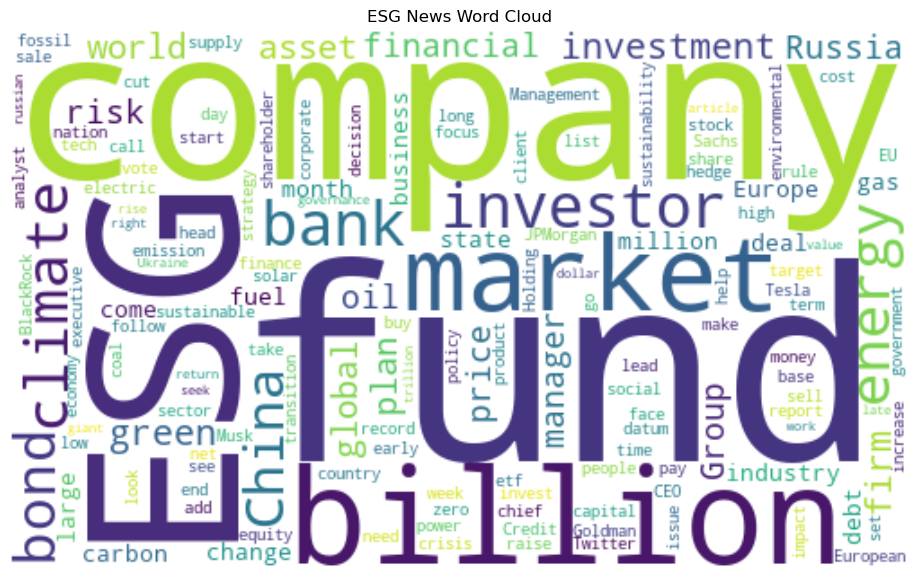

In [3]:
text = " ".join(df['content_clean'].astype(str)) # combine all the content
stopwords = set(STOPWORDS)
stopwords.update(["said", "say", "year", "may", "one", "two", "many", "among", "accord", "include","big","new"])

# create the word cloud
wordcloud = WordCloud(
    width=500,
    height=300,
    background_color='white',
    stopwords=stopwords,
    max_words=150,
    collocations=False
).generate(text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('ESG News Word Cloud')
wordcloud.to_file("total_wordcloud.png")
plt.show()

Sentiment Analysis

In [4]:
# sentiment analysis
sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['content_clean'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x>0.05 else ('negative' if x<-0.05 else 'neutral'))
df['sentiment'].value_counts()
df

,Date,headline,text,content_clean,sentiment_score,sentiment
0,2022/11/28,Top-Ranked Hedge Fund Makes Contrarian Bet on ...,As most techology stocks reel from higher inte...,Ranked Hedge Fund make contrarian Bet Meta tec...,0.8957,positive
1,2022/11/27,Deutsche Bank's DWS CEO Mulls New Legal Setup,DWS Group CEO Stefan Hoops is considering chan...,Deutsche Bank DWS CEO mull New Legal Setup DWS...,0.9169,positive
2,2022/11/24,"JPMorgan, Deutsche Bank Sued by Epstein Accusers",JPMorgan Chase & Co. and Deutsche Bank AG were...,JPMorgan Deutsche Bank sue Epstein Accusers JP...,0.2263,positive
3,2022/11/23,Tech Job Cuts Increase 'Anxiety Across Industry,"After years of exuberant growth and hiring, la...",Tech Job Cuts Increase Anxiety Industry year e...,-0.2960,negative
4,2022/11/22,"Amundi, DWS Reclassify Funds in Major Industry...",Amundi and Deutsche Bank's DWS Group are downg...,Amundi DWS Reclassify Funds Major Industry Res...,0.3182,positive
...,...,...,...,...,...,...
301,2021/10/28,Trillion-Dollar Boom Rings Bubble-Trouble Alarm,The doing-well-by-doing-good conviction drivin...,trillion Dollar Boom Rings bubble Trouble Alar...,0.8402,positive
302,2021/10/26,Jet Fuel Surges in Price as Travel Restriction...,Jet fuel is back in a big way. The oil product...,jet Fuel Surges Price Travel Restrictions Ease...,-0.9100,negative
303,2021/10/25,Rich Nations Fail to Meet Climate Target Befor...,Rich countries have failed to meet their pledg...,Rich Nations fail meet Climate Target rich cou...,0.6705,positive
304,2021/10/24,Negotiators Edge Closer to Global Carbon Marke...,Nations are edging toward a deal that might cr...,negotiator Edge close Global Carbon Market Dea...,0.8555,positive


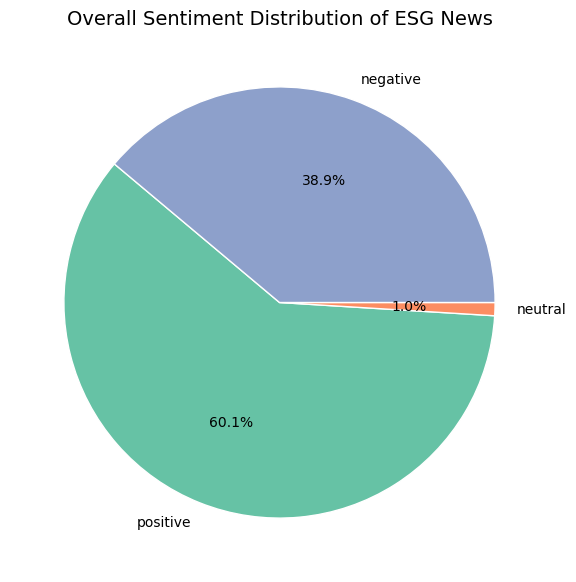

In [5]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

sent_counts = df['sentiment'].value_counts().reindex(['positive', 'neutral', 'negative'])
colors = ['#66c2a5', '#fc8d62', '#8da0cb'] 

# create the pie chart
plt.figure(figsize=(7,7))
plt.pie(
    sent_counts,
    labels=sent_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Overall Sentiment Distribution of ESG News', fontsize=14)
plt.savefig("overall_sentiment.png", dpi=300, bbox_inches='tight')
plt.show()


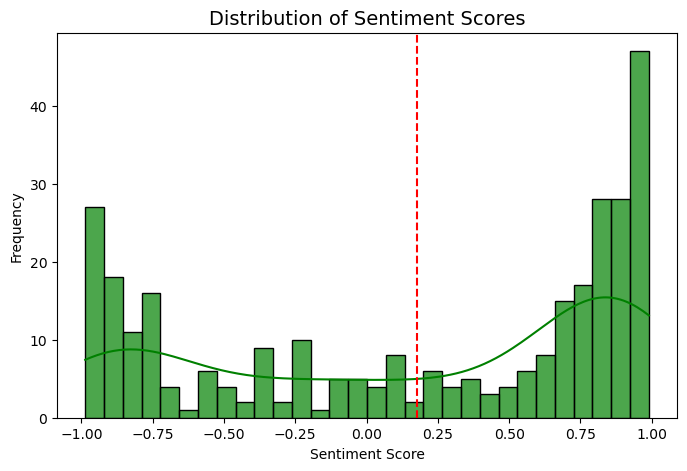

In [6]:
# distribution of sentiment scores
plt.figure(figsize=(8,5))
sns.histplot(df['sentiment_score'], bins=30, kde=True, color='green', alpha=0.7)
plt.axvline(df['sentiment_score'].mean(), color='red', linestyle='--', label=f"Mean: {df['sentiment_score'].mean():.2f}")
plt.title('Distribution of Sentiment Scores', fontsize=14)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.savefig("sentiment_score.png", dpi=300, bbox_inches='tight')
plt.show()

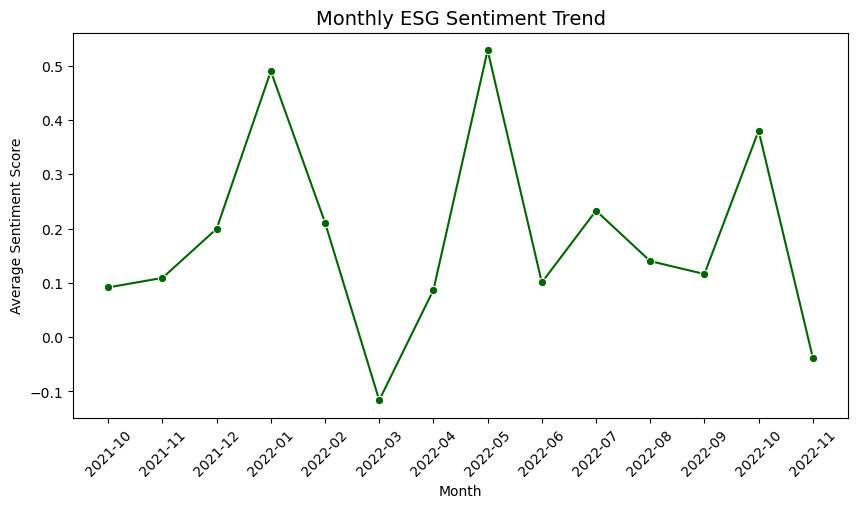

In [7]:
# monthly sentiment score
# calculate sentiment score
df['Month'] = df['Date'].dt.to_period('M')
monthly_trend = df.groupby('Month')['sentiment_score'].mean().reset_index()
monthly_trend['Month'] = monthly_trend['Month'].astype(str)

plt.figure(figsize=(10,5))
sns.lineplot(x='Month', y='sentiment_score', data=monthly_trend, marker='o', color='darkgreen')
plt.title('Monthly ESG Sentiment Trend', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.savefig("sentiment_trend.png", dpi=300, bbox_inches='tight')
plt.show()

Analyze the reason of the drop on 2022-03

Create the word cloud for positive & negative news

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 common words: {'say': 374, 'company': 236, 'ESG': 229, 'year': 225, 'fund': 224, 'billion': 180, 'market': 149, 'investor': 147, 'China': 126, 'climate': 121}


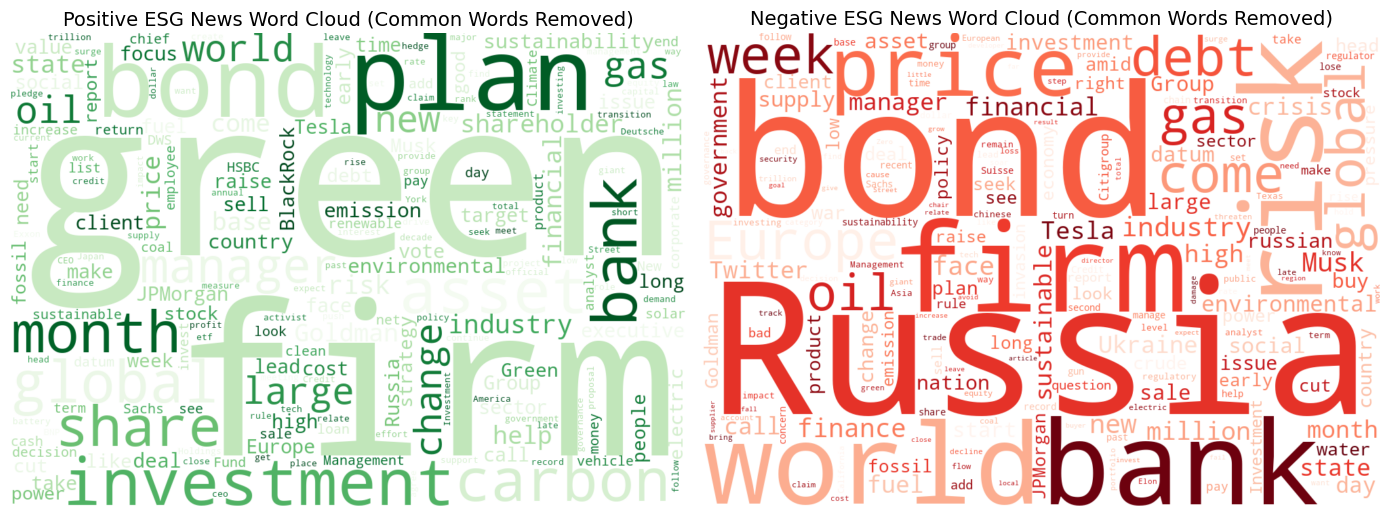

In [9]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# ==== Step 1: define the text cleaning function ====
def clean_text(text):
    text = str(text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    tokens = [w for w in text.split() if w.lower() not in stopwords.words('english') and len(w) > 2]
    return tokens

# ==== Step 2: Extract positive and negative text ====
positive_texts = " ".join(df[df['sentiment'] == 'positive']['content_clean'].astype(str))
negative_texts = " ".join(df[df['sentiment'] == 'negative']['content_clean'].astype(str))

# ==== Step 3: Segment words and count the frequency ====
pos_tokens = clean_text(positive_texts)
neg_tokens = clean_text(negative_texts)

pos_counts = Counter(pos_tokens)
neg_counts = Counter(neg_tokens)

# ==== Step 4: Identify the common frequent words ====
common_words = set(pos_counts.keys()) & set(neg_counts.keys())

# Calculate the total frequency of common words
common_freqs = {word: pos_counts[word] + neg_counts[word] for word in common_words}
top_common = dict(sorted(common_freqs.items(), key=lambda x: x[1], reverse=True)[:10])

print("Top 10 common words:", top_common)

# ==== Step 5: Remove these cowords from the positive and negative sets ====
for word in top_common.keys():
    if word in pos_counts:
        del pos_counts[word]
    if word in neg_counts:
        del neg_counts[word]

# ==== Remove specific meaningless words ====
custom_remove = ['energy', 'company', 'market', 'business', 'accord','include','big','Bank']
for w in custom_remove:
    pos_counts.pop(w, None)
    neg_counts.pop(w, None)

# ==== Step 6: Create the wordcloud ====
# positive wordcloud
pos_wc = WordCloud(width=1000, height=700, background_color='white', colormap='Greens_r').generate_from_frequencies(pos_counts)

# negative wordcloud
neg_wc = WordCloud(width=1000, height=700, background_color='white', colormap='Reds_r').generate_from_frequencies(neg_counts)

# ==== Step 7: Visualization ====
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.imshow(pos_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Positive ESG News Word Cloud (Common Words Removed)', fontsize=14)

plt.subplot(1,2,2)
plt.imshow(neg_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Negative ESG News Word Cloud (Common Words Removed)', fontsize=14)

plt.savefig("pos&neg_wordcloud.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()